## **Eduardo Carrasco Vidal** <img src="img/logo.png" align="right" style="width: 120px;"/>
**Magister en Inteligencia Artificial, Universidad Adolfo Ibáñez.**

**Profesor:** Adrián Soto Suárez.
**Curso:** Aprendizaje de Máquinas (Machine Learning).

Enlace al repositorio del alumno en [GitHub](https://github.com/educarrascov/MIA_MachineLearning) _@educarrascov_

![Python](https://img.shields.io/badge/python-%2314354C.svg) 


# Actividad Aprendizaje Automático

En este _notebook_ vamos a presentar la actividad final del curso aprendizaje automático. Se divide en 3 partes:

- Evaluación de desempeño de un clasificador.
- Clustering y reducción de dimensionalidad.
- Clasificación con Random Forests.

Cada una de estas partes vale **2 puntos**. La nota final será el **número de puntos + 1**.

## 1. Evaluando el clasificador Naive Bayes\[2 pts\]

En esta pregunta debes evaluar el clasificador **Naive Bayes** presentado en clases, que predecía si un correo era Spam o no. Para evaluarlo se pide que calcules:

- El _accuracy_.
- _Precision_ y _recall_.
- _F1-Score_.
- Curva de _Precision vs Recall_.
- Curva ROC.

Luego, en base a tus resultados, debes explicar que tan bueno crees que es el clasificador y si crees que se puede mejorar.

Primero se crea el entorno para efectuar la clasificación binaria de los correos: spam o no spam. Para lo anterior, se utilizará el calsificador de Naive Bayes.


In [365]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import glob

# Recuerda ubicar los mails junto a este _notebook_
PATH_MAILS = 'mails-raw/*/*'

mails = []
answers = []

# entrenar el clasificador Naive bayes

for filename in glob.glob(PATH_MAILS):
    # Checkeamos si es spam o no
    is_spam = 'ham' not in filename
    
    # Ignoramos los posibles errores al abrir un archivo
    with open(filename, errors='ignore') as mail_file:
        for line in mail_file:
            if line.startswith("Subject:"):
                # Hacemos strip desde la izquierda
                subject = line.lstrip("Subject: ")
                mails.append(subject.strip())
                if is_spam:
                    answers.append(1)
                else:
                    answers.append(0)
                break
                
# Creamos los _datasets_
X_train, X_test, y_train, y_test = train_test_split(mails, answers)

# Count vectorizer para representar las features
vect = CountVectorizer() # contar palabras en una dimensión
vect.fit(X_train)

# Creamos nuestra matriz para el _dataset_ de entrenamiento
X_train_vect = vect.transform(X_train)
# Creamos nuestra matriz para el _dataset_ de rueba
X_test_vect = vect.transform(X_test) # Notar que estamos transformando con el fit del dataset de entrenamiento

# Instanciamos y entrenamos el modelo
nb= MultinomialNB()
nb.fit(X_train_vect, y_train)

MultinomialNB()

In [366]:
type(X_train_vect) # para ver el tipo de X_train_vect, entrega una matriz sparse

scipy.sparse.csr.csr_matrix

In [367]:
print (X_train_vect) #obtenemos un vector que informa, posición 0, palabra 438-2397 y 2741.

  (0, 652)	1
  (0, 1333)	1
  (0, 2511)	1
  (0, 3331)	1
  (0, 3419)	1
  (1, 1151)	1
  (1, 2710)	1
  (1, 2854)	1
  (1, 2942)	1
  (1, 3139)	1
  (1, 3443)	1
  (2, 360)	1
  (2, 384)	1
  (2, 414)	1
  (2, 539)	1
  (2, 1703)	1
  (2, 2696)	1
  (2, 2823)	1
  (2, 3418)	1
  (2, 3719)	1
  (3, 69)	1
  (3, 1517)	1
  (3, 1778)	1
  (3, 1826)	1
  (3, 2289)	1
  :	:
  (2470, 1768)	1
  (2470, 2410)	1
  (2470, 3302)	1
  (2470, 3540)	1
  (2471, 511)	1
  (2471, 2365)	1
  (2471, 2710)	2
  (2471, 2954)	1
  (2471, 3550)	1
  (2471, 3577)	1
  (2472, 333)	1
  (2472, 2710)	1
  (2472, 3700)	1
  (2473, 45)	1
  (2473, 127)	1
  (2473, 767)	1
  (2473, 1263)	1
  (2473, 1505)	1
  (2473, 1816)	1
  (2473, 3031)	1
  (2473, 3278)	1
  (2473, 3563)	1
  (2474, 2196)	1
  (2474, 2318)	1
  (2474, 2710)	1


In [368]:
nb.predict(X_test_vect) # para obtener las predicciones de los datos de prueba.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [369]:
y_predicted = nb.predict(X_test_vect) # con esta generamos la función de predicción que nos permitirá evaluar las métricas.

### 1.1. Accuracy: 
Antes de efectuar el cálculo de las métricas, se efectuará un cálculo de la **matriz de confusión** con el objeto de comprender de manera gráfica los siguientes parámetros: **T**rue **P**ositive (Verdadero Positivo), **T**rue **N**egative (Verdadero Negativo), **F**alse **P**ositive (Falso Positivo) y **F**alse **N**egative (Falso Negativo) de la predicción y generalmente se utiliza para obtener el rendimiento de un modelo de clasificación.

In [370]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[679,  18],
       [ 47,  81]])

Para mayor entendimiento, en la siguiente imagen se observan los parámetros de la matríz de confusión para este caso particular de un planteamiento de problema binario, como el presente, que clasifica si es **Spam o no**.

<img src="img/matriz.png" align="left" style="width: 320px;"/>

Considerando lo anterior y la definición dada de cada parámetro, efectuamos el cálculo de **El Accuracy** (Exactitud), que se refiere a lo cerca que está el resultado de una medición del valor verdadero, en otras palabras, la proporción de predicciones que el modelo clasificó correctamente.

In [371]:
from sklearn import metrics
Y_pred_class= nb.predict(X_test_vect)
metrics.accuracy_score(y_test, Y_pred_class)

0.9212121212121213

Como se observa en el resultado anterior, el 93.9% de las veces, el modelo es capaz de efectuar una buena predicción.
Lo anterior se obtiene de la siguiente ecuación:

$$
\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}
$$

### 1.2. Precision y recall:
Ejecutamos una función para obtener el valor de **Precision** que representa el valor predictivo positivo y es la proporción de instancias relevantes entre las instancias recuperadas, en otras palabras, define qué proporción de identificaciones positivas fue realmente correcta.

In [372]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score, confusion_matrix, precision_score
precision_score(y_test, y_predicted) # con esta función obtenemos la precisión.

0.8181818181818182

Como se observa en el resultado anterior, el 88.7% de las veces, el modelo es capaz de efectuar una predicción positiva de manera correcta.
Lo anterior se obtiene de la siguiente ecuación:

$$
\text{Precision} = \frac{TP}{TP+FP}
$$

En el caso del **Recall** (Sensibilidad), representa la proporción de la cantidad total de instancias pertinentes que se recuperaron realmente (True Positive Rate).

In [373]:
recall_score(y_test, y_predicted) # con esta función obtenemos el recall.

0.6328125

Como se observa en el resultado anterior, el 68.8% representa la tasa de positividad verdadera (**T**rue **P**ositive **R**ate).
Lo anterior se obtiene de la siguiente ecuación:

$$
\text{Recall} = {TPR} = \frac{TP}{TP+FN}
$$

### 1.3. F1-Score:

Esta métrica es una medida de la precisión de una prueba, es la media armónica de precisión y recuperación.

In [374]:
f1_score(y_test, y_predicted)

0.7136563876651982

Puede tener una puntuación máxima de 1 (precisión y recuerdo perfectos) y una mínima de 0, representando la robustes del modelo, para este caso, se obtuvo 0.77.
Lo anterior se obtiene de la siguiente ecuación:

$$
\text{F1_Score} = \frac{2*(Precision*Recall)}{Precision + Recall} = \frac{2TP}{2TP+FP+FN}
$$

De igual manera, podemos obtener el reporte de clasificación, que permite obtener todas las métricas, representando las 2 clases (**Spam o no**).

In [375]:
print (classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       697
           1       0.82      0.63      0.71       128

    accuracy                           0.92       825
   macro avg       0.88      0.80      0.83       825
weighted avg       0.92      0.92      0.92       825



### 1.4. Curva Precision V/S Recall:

Para obtener la curva Precision v/s Recall, debemos generar una validación cruzada para obtener el puntaje, posteriormente podemos observar el `y_scores` y por último, plotear el registro de precisión y recall.

In [376]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# Generamos la función de decisión para generar el puntaje
y_scores = cross_val_predict(nb, X_train_vect, y_train, cv=5, method='predict_proba') # le paso el clasificador,
# datos de entrenamiento, y de entrenamiento y 

In [377]:
y_scores.shape #cantidad de registros.

(2475, 2)

In [378]:
y_scores[:,1] #sólo la columna de la derecha.

array([3.43460718e-03, 4.51601571e-06, 9.36620439e-01, ...,
       1.21434226e-01, 9.97198123e-01, 1.13843696e-03])

In [379]:
y_scores_proc=[]

for row in y_scores:
    y_scores_proc.append(row[1])
    
# Generamos las variables necesarias:
precisions, recalls, thresholds = precision_recall_curve (y_train, y_scores_proc)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(loc='center right', fontsize=16)

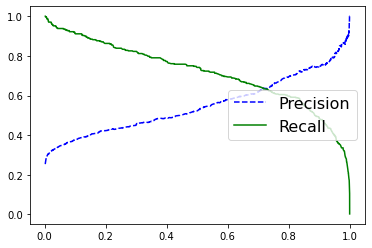

In [380]:
import matplotlib.pyplot as plt

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### 1.5. Curva ROC:

Esta gráfica que enfrenta la tasa de falsos positivos (**T**rue **P**ositive **R**ate) (eje x) con la razón de falsos negativos (**F**alse **P**ositive **R**ate (eje y), permite medir falsa alarma en torno a un porcentaje de éxito.


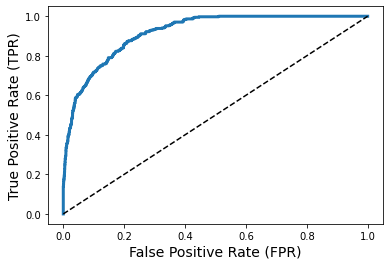

In [381]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores_proc)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    
plot_roc_curve(fpr, tpr)
plt.show()

Mientras más alejado de la linea punteada, es un mejor clasificador.

De igual manera, se efectuará el cálculo del área debajo de la curva (AUC), que puede ser utilizado como resumen de la calidad del modelo

In [382]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_proc)

0.9181596694941685

Como se observa y considerando que para efectuar comparación de clasificadores se utiliza la AUC, un clasificador perfecto tendrá un valor = 1, el modelo propuesto tiene un **0.91**.

## 2. Reducción de dimensionalidad y clustering

En esta actividad vamos a trabajar con el _Dataset Iris_ para revisar conceptos de reducción de dimensionalidad y _clustering_.

### 2.1. Reducción de dimensionalidad\[1 pto\]

En esta parte vamos a hacer algunas pruebas clasificando elementos tras haber hecho reducción de dimensionalidad. Tomemos el código base de clases:

In [383]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()

# Recordemos que el dataset original tiene 4 features
X = iris['data']
y = iris['target']

# Recuerda que estas son las features
iris['feature_names']

# Ahora vamos a reducir la dimensionalidad
# Queremos reducir de 4 a 2 dimensiones
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(X)

In [384]:
iris['feature_names'] #Esto permite ver la cantidad de dimensiones que posee el dataset (4 en este caso).

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

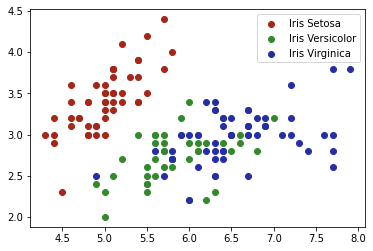

In [385]:
import matplotlib.pyplot as plt

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(X [y==0, 0], X [y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X [y==1, 0], X [y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X [y==2, 0], X [y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

Ahora se pide que hagas un predictor del tipo de flor en base a los _datasets_ con menos dimensiones y el original. En concreto se pide que entrenes tres predictores con cada uno de los siguientes _datasets_:

- El _dataset_ luego de aplicar PCA con una componente.
- El _dataset_ luego de aplicar PCA con dos componentes.
- El _dataset_ original.

Para cada predictor se pide que midas el _accuracy_, la precisión y el _recall_ sobre un _dataset_ de prueba (la proporción entre entrenamiento - prueba la debes escoger tú). 

**Ojo**: la división de entrenamiento - prueba debe ser la misma para los tres casos, y en cada caso debes hacer `fit` de PCA solamente con el _dataset_ de entrenamiento, luego para el _dataset_ de prueba solamente debes usar  `transform`. Compara los resultados entre los predictores, y contesta la siguiente pregunta:

> ¿Cómo se comporta el predictor a medida que bajan las dimensiones? ¿Crees que se pierde mucho al reducir dimensionalidad, en términos de _performance_ del clasificador?

Para esta pregunta, puedes usar el clasificador que tú desees (por ejemplo, _random forest_).

#### 2.1.1. El dataset con PCA de una componente utilizando el clasificador Random Forest.

Para esto, se efectuará la reducción de las 4 dimensiones obtenidas inicialmente ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)') a un total de 1 y posteriormente se le aplicará un clasificador random forest, para luego, obtener sus métricas.

In [298]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()

X = iris['data']
y = iris['target']

pca = PCA(n_components=1) # reducimos a uno la dimensionalidad.

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split (X, y)

X_train_1D = pca.fit_transform (X_train_1)

Obtenido el `X_train_1D`, se implementa el clasificador Ramdon Forrest. 

In [299]:
pca.explained_variance_ratio_ # varianzas por componente, este caso con 1.

array([0.92316843])

Con esto, comprendemos que la componente guarda un 92,3% de la varianza.

In [292]:
X_test_1D = pca.transform(X_test_1)

In [293]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf1d = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, random_state=42) # número de
# estimadores y máximo de nodos en las hojas
rnd_clf1d.fit(X_train_1D, y_train_1)
rnd_clf1d.classes_ # con esto vemos las clases (Setosa, Versicolor, Virginica)

array([0, 1, 2])

In [294]:
y_pred_rf_1D = rnd_clf1d.predict(X_test_1D)
print(y_pred_rf_1D)

[0 0 1 0 2 1 2 2 2 1 0 0 1 2 2 2 1 2 2 0 0 2 2 2 2 2 0 2 2 0 0 1 2 2 1 1 1
 2]


In [295]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test_1, y_pred_rf_1D))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.57      0.70        14
           2       0.68      0.93      0.79        14

    accuracy                           0.82        38
   macro avg       0.86      0.83      0.83        38
weighted avg       0.84      0.82      0.81        38



In [296]:
conf_mx_1D =confusion_matrix(y_test_1, y_pred_rf_1D)
conf_mx_1D

array([[10,  0,  0],
       [ 0,  8,  6],
       [ 0,  1, 13]])

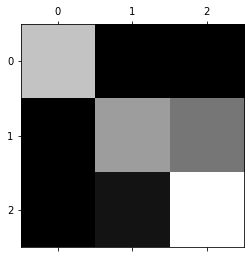

In [297]:
plt.matshow(conf_mx_1D, cmap=plt.cm.gray)
plt.show()

#### 2.1.2. El dataset con PCA de dos componentes utilizando el clasificador Random Forest:

In [300]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = iris['data']
y = iris['target']

pca = PCA(n_components=2) # reducimos a dos la dimensionalidad.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split (X, y)

X_train_2D = pca.fit_transform (X_train_2)

In [302]:
pca.explained_variance_ratio_ # varianzas por componente, este caso con 2.

array([0.93496715, 0.04370125])

La primera componente "guarda" un 93,5% de la varianza total, y la segunda componente guarda 4,4%

In [308]:
X_test_2D = pca.transform(X_test_2)

rnd_clf2d = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, random_state=42) # número de
# estimadores y máximo de nodos en las hojas
rnd_clf2d.fit(X_train_2D, y_train_2)
rnd_clf2d.classes_ # con esto vemos las clases (Setosa, Versicolor, Virginica)

array([0, 1, 2])

In [309]:
y_pred_rf_2D = rnd_clf2d.predict(X_test_2D)
print(y_pred_rf_2D)

[2 2 1 0 1 0 1 1 0 1 2 1 2 1 0 1 0 2 1 2 2 2 0 2 1 0 0 2 0 1 1 1 2 2 1 0 1
 0]


In [310]:
from sklearn.metrics import classification_report
print (classification_report(y_test_2, y_pred_rf_2D))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [311]:
conf_mx_2D =confusion_matrix(y_test_2, y_pred_rf_2D)
conf_mx_2D

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 11]])

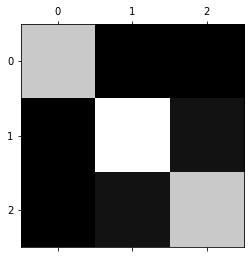

In [312]:
plt.matshow(conf_mx_2D, cmap=plt.cm.gray)
plt.show()

#### 2.1.3. El dataset original utilizando el clasificador Random Forest:

In [273]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split (X, y)

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, random_state=42) # número de
# estimadores y máximo de nodos en las hojas

rnd_clf.fit(X_train, y_train)
rnd_clf.classes_ # con esto vemos las clases (Setosa, Versicolor, Virginica)

array([0, 1, 2])

In [274]:
y_pred_rf = rnd_clf.predict(X_test)
print(y_pred_rf)

[2 1 2 1 1 1 1 0 0 2 1 0 2 1 2 1 2 2 0 1 0 0 1 1 2 2 1 2 2 0 1 2 0 0 0 1 0
 0]


In [275]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [276]:
conf_mx =confusion_matrix(y_test, y_pred_rf)
conf_mx

array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 11]])

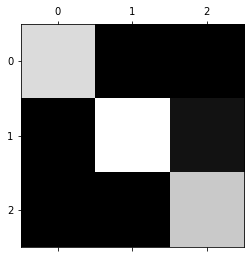

In [277]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### 2.1.4. Conclusiones:

**(Considerar que los porcentajes cambian, cada vez que se corre el código, debido a la asignación random que efectúa)**

 Si se efectúa una comparación de los 3 modelos obtenidos, se puede concluir que al reducir a sólo una dimensión, disminuye el Accuracy del modelo a un **89%**, comparado con el modelo original que tiene un **95%** de Accuracy.
 
Por otra parte, si efectuamos una comparación del modelo original con el que aplica un PCA =  2, se obtiene un incremento en el Accuracy de **97%**.
 
Por lo anterior, lo más conveniente al analizar cada modelo y aplicar técnicas de reducción de dimensionalidad, es efectuar una comparación de las métricas, de manera de no disminuir la eficiencia general del modelo.

### 2.2. Clustering\[1 pto\]

En esta parte vamos a poner a prueba las técnicas de _clustering_ sobre el _dataset Iris_ para comprender que tan bien este algoritmo puede descubrir las etiquetas reales. En concreto se pide lo siguiente:

- Ejecuta el algoritmo de KMeans sobre el _Dataset Iris_ con sus 4 features para descubrir **3 clusters**. Luego, compara los resultados del algoritmo con las etiquetas reales. ¿Qué tan bien crees que el algoritmo descubrió las etiquetas reales?
- Luego repite el procedimiento sobre el _Dataset Iris_ luego de haber hecho PCA con 2 componentes. ¿Qué tanto cambia el resultado al haber reducido las dimensiones?

In [321]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()

# Recordemos que el dataset original tiene 4 features
X = iris['data']
y = iris['target']

#### 2.2.1. Algoritmo de KMeans sobre el _Dataset Iris_ con sus 4 features para descubrir **3 clusters**:


In [322]:
# Obtenemos las 4 features.
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [329]:
# Importamos K-means
from sklearn.cluster import KMeans

k = 5 # de acuerdo al enunciado
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X) # como es aprendizaje no supervisado solo pasamos X, en general cuando hay un _
# es una composición de dos funciones


In [330]:
# Vamos las etiquetas predecidas por el algoritmo K-means
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

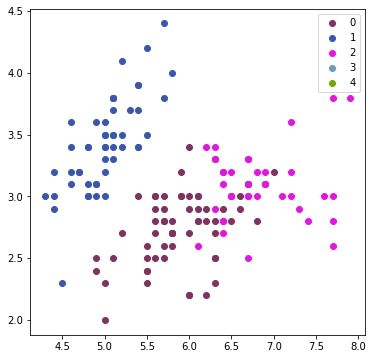

In [349]:
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04']

plt.figure(figsize=(6, 6))

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0') # filtro clasificados con cero
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1') # filtro clasificados con uno
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2') # filtro clasificados con dos
plt.scatter(X[y_pred==3, 0], X[y_pred==3, 1], c=cmap_bold[3], label='3') # filtro clasificados con tres
plt.scatter(X[y_pred==4, 0], X[y_pred==4, 1], c=cmap_bold[4], label='4') # filtro clasificados con cuatro

plt.legend()
plt.show()

In [328]:
kmeans.inertia_

78.851441426146

Utilizamos el método del codo para determinar el número óptimo de clúster.

In [335]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

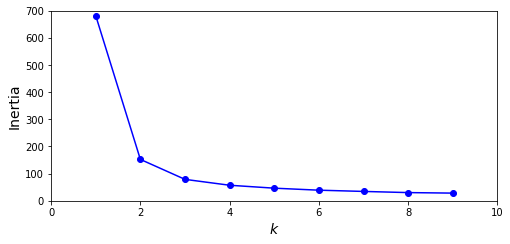

In [356]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([0, 10, 0, 700])
plt.show()

Como a través del método del codo obtuvimos que el número óptimo de clúster es = 3, ejecutamos nuevamente el algoritmo para k =3.

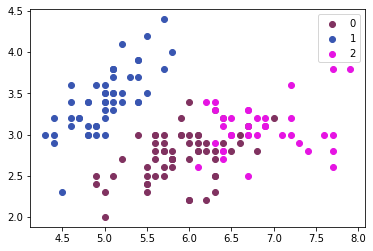

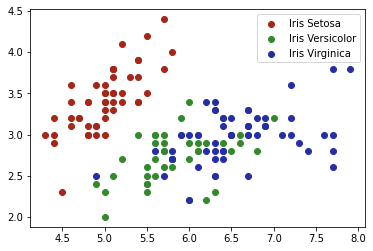

In [386]:
k = 3 # de acuerdo al enunciado
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
cmap_bold = ['#803260', '#3956b1', '#e614e3']

plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c=cmap_bold[0], label='0') # filtro clasificados con cero
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c=cmap_bold[1], label='1') # filtro clasificados con uno
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1], c=cmap_bold[2], label='2') # filtro clasificados con dos

plt.legend()
plt.show()

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(X [y==0, 0], X [y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X [y==1, 0], X [y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X [y==2, 0], X [y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

Como se observa e la comparación de ambos gráficos, al aplicar un método de kmeans y descubrir el óptimo mediante la técnica del codo, observamos que el algoritmo tiene la capacidad de identificar de buena manera las etiquetas de clase (`Setosa`, `Versicolor`y `Virginica`).

Lo anterior, no consideró una reducción de la dimensionalidad, como se efectuará en el siguiente etapa.

#### 2.2.2. Aprocedimiento sobre el _Dataset Iris_ luego de haber hecho PCA con 2 componentes:


In [359]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()

X = iris['data']
y = iris['target']

iris['feature_names']

# Ahora vamos a reducir la dimensionalidad
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(X)

In [360]:
from sklearn.cluster import KMeans

k = 3 # de acuerdo al enunciado
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_2D)

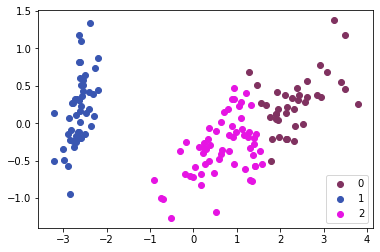

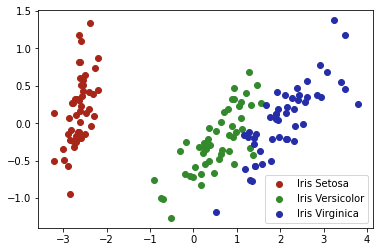

In [362]:
import matplotlib.pyplot as plt

cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04']

plt.scatter(X_2D[y_pred==0, 0], X_2D[y_pred==0, 1], c=cmap_bold[0], label='0') # filtro clasificados con cero
plt.scatter(X_2D[y_pred==1, 0], X_2D[y_pred==1, 1], c=cmap_bold[1], label='1') # filtro clasificados con uno
plt.scatter(X_2D[y_pred==2, 0], X_2D[y_pred==2, 1], c=cmap_bold[2], label='2') # filtro clasificados con dos

plt.legend()
plt.show()

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(X_2D[y==0, 0], X_2D[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X_2D[y==1, 0], X_2D[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X_2D[y==2, 0], X_2D[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

Como se observa en la figura, se obtienen similares resultados al aplicar clustering para reconocimiento de etiquetas de clase (`Setosa`, `Versicolor`y `Virginica`), tras aplicar técnicas de reducción de dimensionalidad.

A pesar de haber reducido las features (dimensiones), el algoritmo Kmeans de igual manera reconoce etiquetas.

## 3. Random Forest

En esta parte vas a entrenar un predictor para el _Dataset Fashion MNist_, que es similar al famoso _dataset_ MNist, pero en este las imágenes corresponden a prendas. La idea es que al ver una imagen, podamos predecir el tipo de prenda. Primero vamos a cargar el _dataset_.

In [363]:
# pip install tensorflow

In [387]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

# Cargamos el dataset, notemos que ya viene dividido
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

Las clases son las siguientes:

In [388]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Vamos a graficar parte del _dataset_.

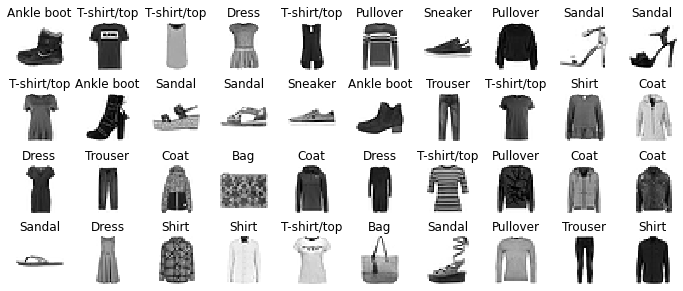

In [389]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Tenemos que cambiar la dimensión de las imagenes de $28\times28$ a $784$.

In [390]:
X_train_full = X_train_full.reshape(X_train_full.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

### 3.1. Visualización con T-SNE \[1 pto\]

Lo primero que debes hacer es visualizar el _dataset_ en dos dimensiones utilizanddo T-SNE (esto te puede servir para entender el _dataset_ a un nivel más profundo. ¿Puedes distinguir los _clusters_ claramente? ¿Qué puedes decir de los elementos de distintas clases que quedan cerca entre sí? Recuerda intentar con un número limitado de imágenes para que tome menos tiempo (ej. 2000 primeras observaciones).

In [391]:
from sklearn.manifold import TSNE

# Programa tu solución acá
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', 
             '#467b5c', '#17fa19', '#926409', '#becdc7', '#f8acaf']
tsne = TSNE(n_components=2)

# Continúa tu tarea a partir de esta línea

No olvides discutir tu solución **en esta celda**.

### 3.2. Entrenando el modelo \[1 pto\]

Ahora debes entrenar un modelo de `Random Forest` para predecir el tipo de prenda del _dataset_ anterior. Debes justificar la elección de los hiperparámetros (por ejemplo, prueba varias combinaciones y decide cuál es la mejor), y además, debes presentar la evaluación del modelo utilizando los datos de prueba que cargamos anteriormente (además de accuracy, puedes presentar una matriz de confusión). ¿Qué opinas del desempeño del predictor? ¿Crees que se puede mejorar?

In [392]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=64, n_jobs=-1) # modificar el número de hiperparámetros.
rnd_clf.fit(X_train_full, y_train_full)

RandomForestClassifier(n_estimators=64, n_jobs=-1)

In [393]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rnd_clf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.97      1000
           2       0.76      0.80      0.78      1000
           3       0.87      0.91      0.89      1000
           4       0.76      0.81      0.78      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



No olvides discutir tu solución **en esta celda**.